In [1]:
import sys
sys.path.append('./src')
sys.path.append('./config')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import load_data as data

In [2]:
data.df_DX_Session.head() 

,transaction_id,id_ocpp,location_name,id_pl,start_volume,end_volume,total_volume,startdate,enddate,duration,authorize,rfid,book_id,auth_method
0,512840826,ParisSaclay30-1,PS 030-1 - IPP - Drahi - X,1,2275.265,2293.518,18.253,2025-05-30T12:04:57Z,2025-05-30T13:38:43Z,5626,RemoteApp,1,NaN,RFID
1,703497342,ParisSaclay30-1,PS 030-1 - IPP - Drahi - X,1,2274.677,2275.181,0.504,2025-05-30T05:42:28Z,2025-05-30T05:44:44Z,136,8E47015B,8E47015B,NaN,RFID
2,412512340,ParisSaclay30-1,PS 030-1 - IPP - Drahi - X,1,2272.276,2274.677,2.401,2025-05-29T22:34:44Z,2025-05-29T22:45:24Z,640,8E47015B,8E47015B,NaN,RFID
5,852888750,ParisSaclay30-1,PS 030-1 - IPP - Drahi - X,1,2264.202,2272.276,8.074,2025-05-29T10:38:30Z,2025-05-29T11:27:56Z,2966,8E47015B,8E47015B,NaN,RFID
7,718583992,ParisSaclay30-1,PS 030-1 - IPP - Drahi - X,1,2263.346,2264.202,0.856,2025-05-28T17:00:49Z,2025-05-29T06:05:31Z,47082,8E47015B,8E47015B,NaN,RFID


In [3]:
data.df_b103_23.head()

,Unnamed: 0,CPO GROUP,organisation,EMSP,EMSP CODE,TVA/Siren,session close date,session start time,session end time,consumption (kWh),...,Evse Id,eMi3,plug type,uuid,compliance,Evse max power (kW),max power (kW),Notification Date,idle fee,charge amount
0,NaN,total_france,Ecole Polytechnique,G2M,G2M,NaN,2023-01-02 19:58:02,2023-01-02 08:54:05,2023-01-02 19:57:59,28.623,...,CU-POLY-BACH-2,FR*TCB*E002028,T2S,0a5005a6-a6ee-4a36-93a1-416c7f5ab851,valid,7,7.2,NaN,0,0
1,NaN,total_france,Ecole Polytechnique,G2M,G2M,NaN,2023-01-02 21:59:45,2023-01-02 17:28:55,2023-01-02 21:59:41,14.442,...,CU-POLY-BACH-7,FR*TCB*E002033,T2S,f86255e9-5cdc-4025-adb9-e9d6f8f992ae,valid,7,3.5,NaN,0,0
2,NaN,total_france,Ecole Polytechnique,G2M,G2M,NaN,2023-01-03 14:56:39,2023-01-03 06:14:38,2023-01-03 14:56:34,19.287,...,CU-POLY-BACH-8,FR*TCB*E002034,T2S,d04d46fa-74f6-4eec-b53c-0c868600d312,valid,7,7.2,NaN,0,0
3,NaN,total_france,Ecole Polytechnique,G2M,G2M,NaN,2023-01-03 09:09:23,2023-01-03 09:09:15,2023-01-03 09:09:19,0.000,...,CU-POLY-BACH-9,FR*TCB*E002035,T2S,768458f3-7124-468b-ac98-9709abdb5247,invalid,7,0.0,NaN,0,0
4,NaN,total_france,Ecole Polytechnique,G2M,G2M,NaN,2023-01-03 22:06:05,2023-01-03 09:09:28,2023-01-03 22:06:00,13.125,...,CU-POLY-BACH-9,FR*TCB*E002035,T2S,808ee361-b204-48e5-8131-1fefe0ec76b2,valid,7,3.7,NaN,0,0


In [4]:
data.df_cleaned_b103.head()

,session close date,session start time,session end time,consumption (kWh),charging start time,charging end time,session duration,charging duration,idTag,Label RFID,Evse Id,plug type,uuid,compliance,max power (kW)
0,2025-05-21 13:20:31,2025-05-21 08:36:01,2025-05-21 13:20:28,13.456,2025-05-21 08:36:01,2025-05-21 13:20:28,285.0,285.0,5207FDDF,Badge 11,4,AC-Level2,1a545a81-ecc8-4718-b7ea-da5879685198,ended,7.2
1,2025-05-21 11:19:53,2025-05-21 11:17:08,2025-05-21 11:19:51,0.051,2025-05-21 11:17:10,2025-05-21 11:17:37,3.0,1.0,04A60F38,BADGE42,5,AC-Level2,9858382d-f3bc-4950-8772-d8c72b1caab7,failed,6.9
2,2025-05-21 08:08:45,2025-05-21 08:07:23,2025-05-21 08:08:42,0.045,2025-05-21 08:07:23,2025-05-21 08:07:57,2.0,1.0,AA41F1A1,Badge24,3,AC-Level2,121800ab-59b7-49d4-b325-962793af96ce,failed,6.0
3,2025-05-21 08:07:18,2025-05-21 08:06:14,2025-05-21 08:07:15,0.045,2025-05-21 08:06:14,2025-05-21 08:06:47,2.0,1.0,AA41F1A1,Badge24,3,AC-Level2,387f2b56-2018-4270-a869-b863c3fd068c,failed,6.5
4,2025-05-20 17:30:59,2025-05-20 15:30:20,2025-05-20 17:30:57,1.391,2025-05-20 15:30:22,2025-05-20 17:19:17,121.0,109.0,74EA193B,polytechnique8,3,AC-Level1,9105d559-f024-45f6-a3e7-ac70bca29978,ended,0.7


In [5]:
data.df_cleaned_b103.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4638 entries, 0 to 4637
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   session close date   4638 non-null   datetime64[ns]
 1   session start time   4638 non-null   datetime64[ns]
 2   session end time     4638 non-null   datetime64[ns]
 3   consumption (kWh)    4638 non-null   float64       
 4   charging start time  4638 non-null   datetime64[ns]
 5   charging end time    4638 non-null   datetime64[ns]
 6   session duration     4638 non-null   float64       
 7   charging duration    4638 non-null   float64       
 8   idTag                4638 non-null   object        
 9   Label RFID           4638 non-null   object        
 10  Evse Id              4638 non-null   object        
 11  plug type            4638 non-null   object        
 12  uuid                 4638 non-null   object        
 13  compliance           4638 non-nul

In [6]:
df = data.df_DX_Session

/tmp/ipykernel_17792/2797451915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df[column_name] / 60


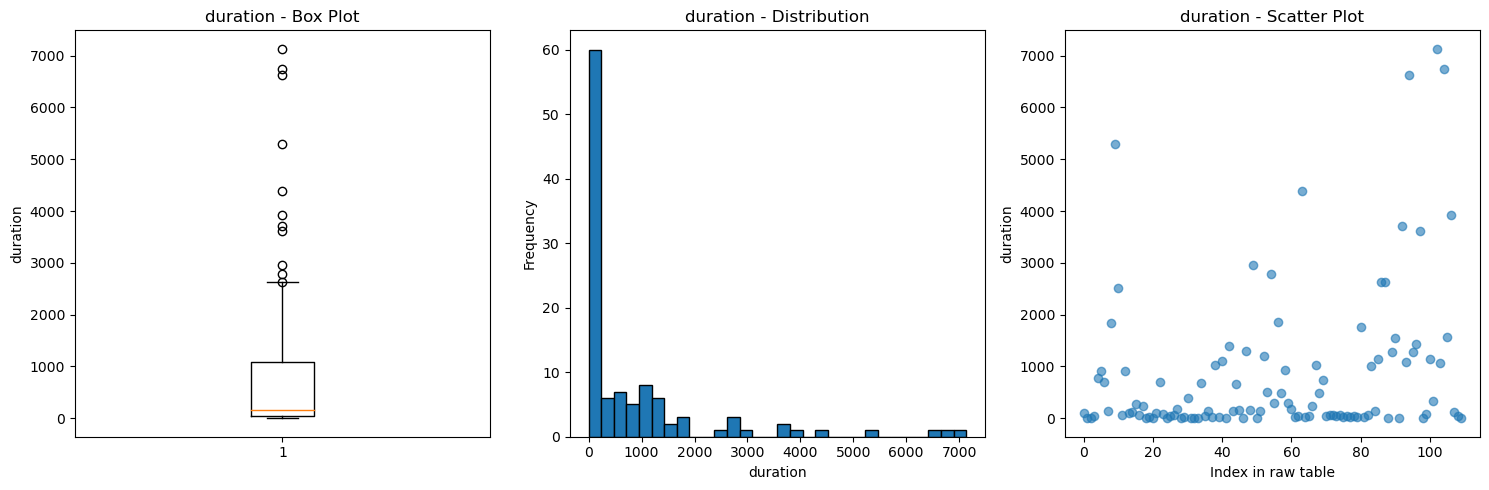

In [7]:
column_name = 'duration'
df[column_name] = df[column_name] / 60

# Visualize the data first
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(df[column_name].dropna())
plt.title(f'{column_name} - Box Plot')
plt.ylabel(column_name)

plt.subplot(1, 3, 2)
plt.hist(df[column_name].dropna(), bins=30, edgecolor='black')
plt.title(f'{column_name} - Distribution')
plt.xlabel(column_name)
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.scatter(range(len(df)), df[column_name], alpha=0.6)
plt.title(f'{column_name} - Scatter Plot')
plt.xlabel('Index in raw table')
plt.ylabel(column_name)

plt.tight_layout()
plt.show()

In [8]:
# Remove outliers using IQR method
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nOutlier detection:")
print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Normal range: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Find outliers
outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
print(f"Outliers found: {outliers.sum()}")

# Remove outliers
df_clean = df[~outliers]
print(f"Data after removing outliers: {len(df_clean)} rows")
print(f"Removed {len(df) - len(df_clean)} rows ({(len(df) - len(df_clean))/len(df)*100:.1f}%)")

# Show statistics after cleaning
print(f"\nAfter cleaning:")
print(df_clean[column_name].describe())



Outlier detection:
Q1: 40.20
Q3: 1077.61
IQR: 1037.40
Normal range: [-1515.90, 2633.71]
Outliers found: 11
Data after removing outliers: 99 rows
Removed 11 rows (10.0%)

After cleaning:
count      99.000000
mean      444.799327
std       600.409386
min         0.016667
25%        28.383333
50%       125.083333
75%       765.708333
max      2630.916667
Name: duration, dtype: float64


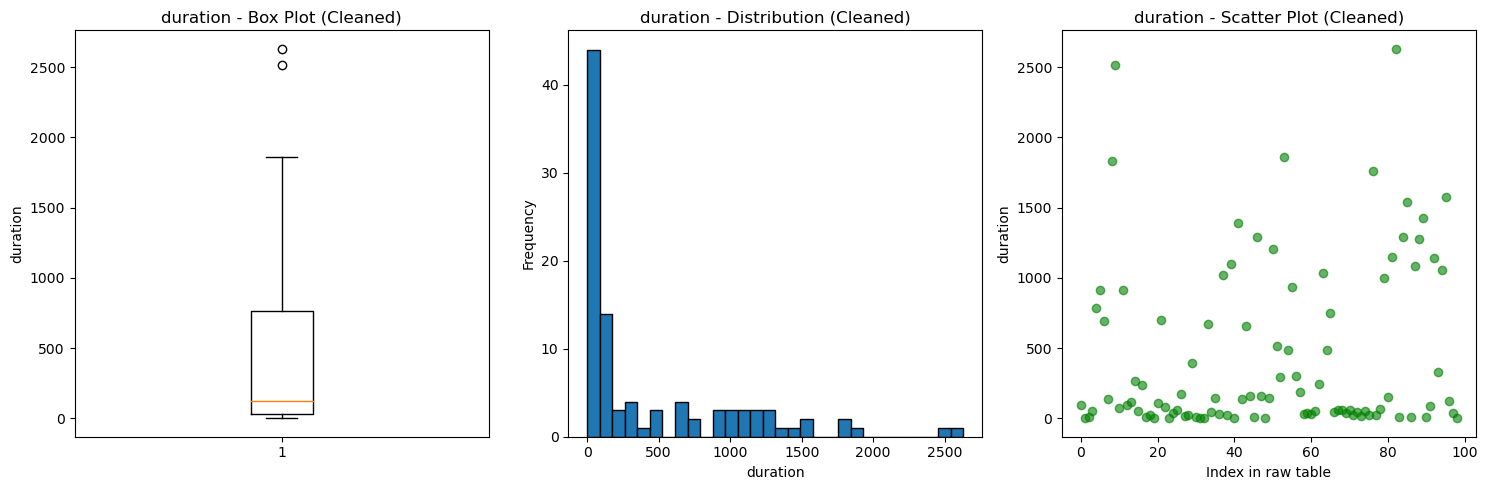

In [9]:

# Visualize cleaned data
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(df_clean[column_name].dropna())
plt.title(f'{column_name} - Box Plot (Cleaned)')
plt.ylabel(column_name)

plt.subplot(1, 3, 2)
plt.hist(df_clean[column_name].dropna(), bins=30, edgecolor='black')
plt.title(f'{column_name} - Distribution (Cleaned)')
plt.xlabel(column_name)
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.scatter(range(len(df_clean)), df_clean[column_name], alpha=0.6, color='green')
plt.title(f'{column_name} - Scatter Plot (Cleaned)')
plt.xlabel('Index in raw table')

plt.ylabel(column_name)

plt.tight_layout()
plt.show()


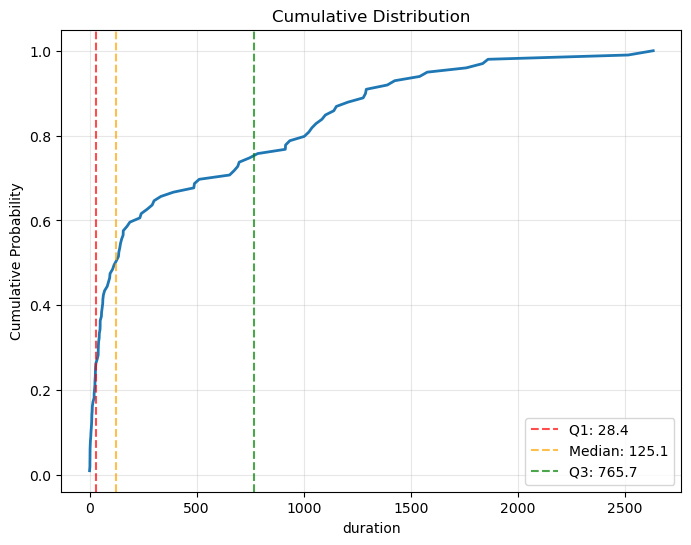

In [10]:
data_sorted = df_clean[column_name].dropna().sort_values()

plt.figure(figsize=(8, 6))
x = np.sort(data_sorted)
y = np.arange(1, len(x) + 1) / len(x)
plt.plot(x, y, linewidth=2)
plt.title('Cumulative Distribution')
plt.xlabel(column_name)
plt.ylabel('Cumulative Probability')
plt.grid(True, alpha=0.3)

# Add quartile lines
q25, q50, q75 = np.percentile(data_sorted, [25, 50, 75])
plt.axvline(q25, color='red', linestyle='--', alpha=0.7, label=f'Q1: {q25:.1f}')
plt.axvline(q50, color='orange', linestyle='--', alpha=0.7, label=f'Median: {q50:.1f}')
plt.axvline(q75, color='green', linestyle='--', alpha=0.7, label=f'Q3: {q75:.1f}')
plt.legend()
plt.show()

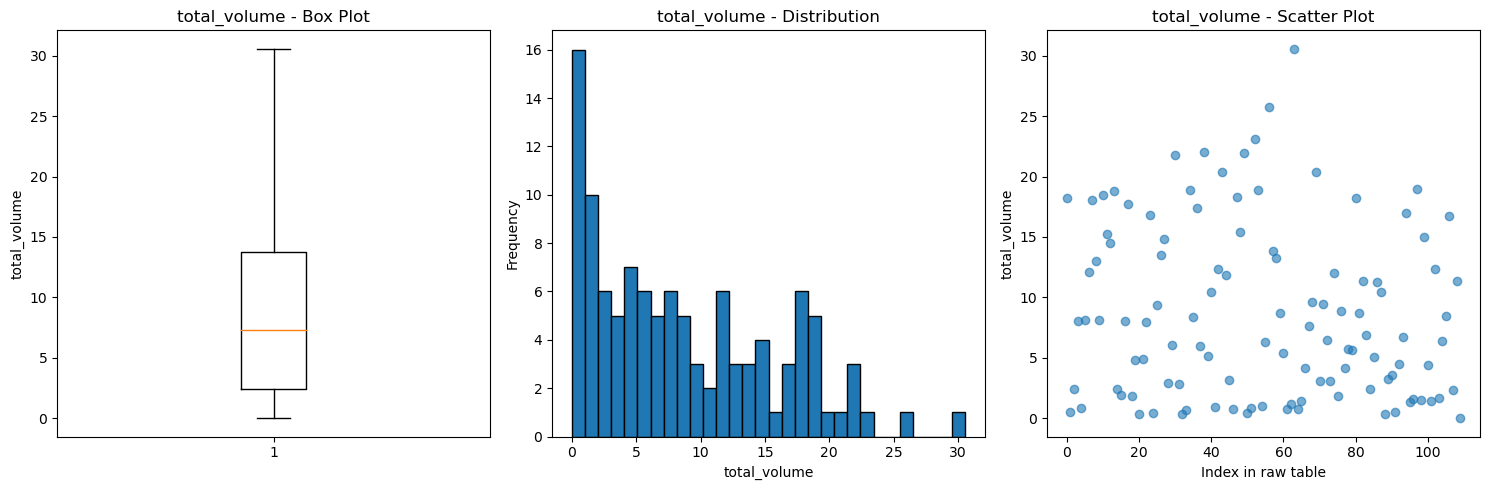

In [11]:
column_name = 'total_volume'

# Visualize the data first
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(df[column_name].dropna())
plt.title(f'{column_name} - Box Plot')
plt.ylabel(column_name)

plt.subplot(1, 3, 2)
plt.hist(df[column_name].dropna(), bins=30, edgecolor='black')
plt.title(f'{column_name} - Distribution')
plt.xlabel(column_name)
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.scatter(range(len(df)), df[column_name], alpha=0.6)
plt.title(f'{column_name} - Scatter Plot')
plt.xlabel('Index in raw table')
plt.ylabel(column_name)

plt.tight_layout()
plt.show()

In [12]:

# Remove outliers using IQR method
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nOutlier detection:")
print(f"Q1: {Q1:.2f}")
print(f"Q3: {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Normal range: [{lower_bound:.2f}, {upper_bound:.2f}]")

# Find outliers
outliers = (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
print(f"Outliers found: {outliers.sum()}")

# Remove outliers
df_clean = df[~outliers]
print(f"Data after removing outliers: {len(df_clean)} rows")
print(f"Removed {len(df) - len(df_clean)} rows ({(len(df) - len(df_clean))/len(df)*100:.1f}%)")

# Show statistics after cleaning
print(f"\nAfter cleaning:")
print(df_clean[column_name].describe())



Outlier detection:
Q1: 2.39
Q3: 13.76
IQR: 11.37
Normal range: [-14.66, 30.81]
Outliers found: 0
Data after removing outliers: 110 rows
Removed 0 rows (0.0%)

After cleaning:
count    110.000000
mean       8.708383
std        7.116821
min        0.001080
25%        2.392750
50%        7.271000
75%       13.760250
max       30.577000
Name: total_volume, dtype: float64


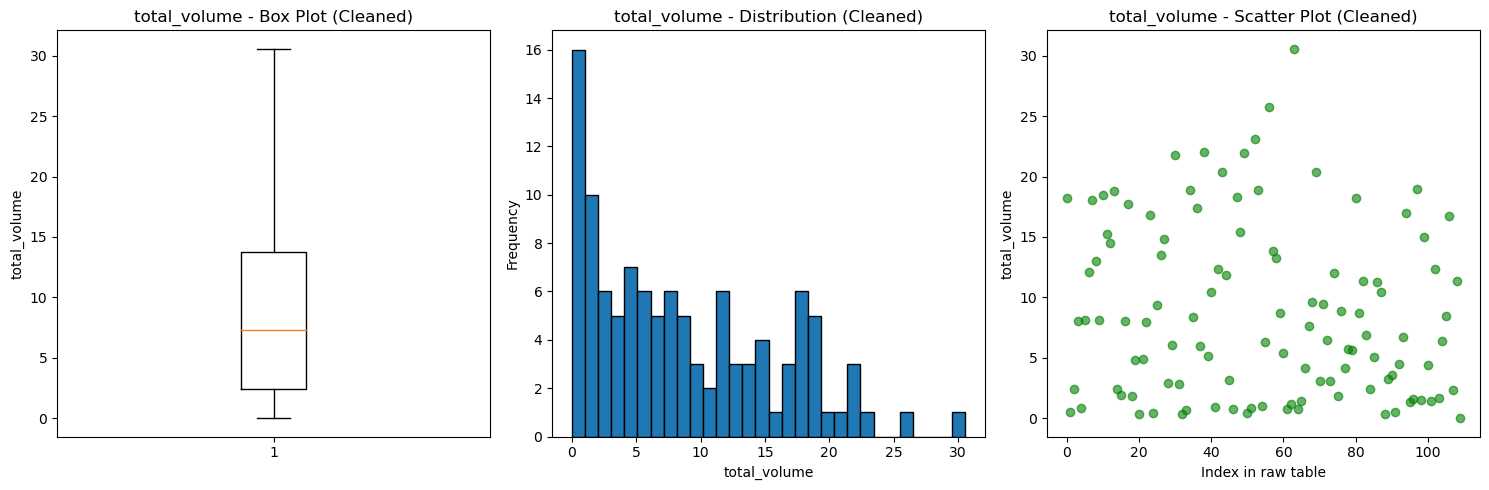

In [13]:
# Visualize cleaned data
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.boxplot(df_clean[column_name].dropna())
plt.title(f'{column_name} - Box Plot (Cleaned)')
plt.ylabel(column_name)

plt.subplot(1, 3, 2)
plt.hist(df_clean[column_name].dropna(), bins=30, edgecolor='black')
plt.title(f'{column_name} - Distribution (Cleaned)')
plt.xlabel(column_name)
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.scatter(range(len(df_clean)), df_clean[column_name], alpha=0.6, color='green')
plt.title(f'{column_name} - Scatter Plot (Cleaned)')
plt.xlabel('Index in raw table')
plt.ylabel(column_name)

plt.tight_layout()
plt.show()


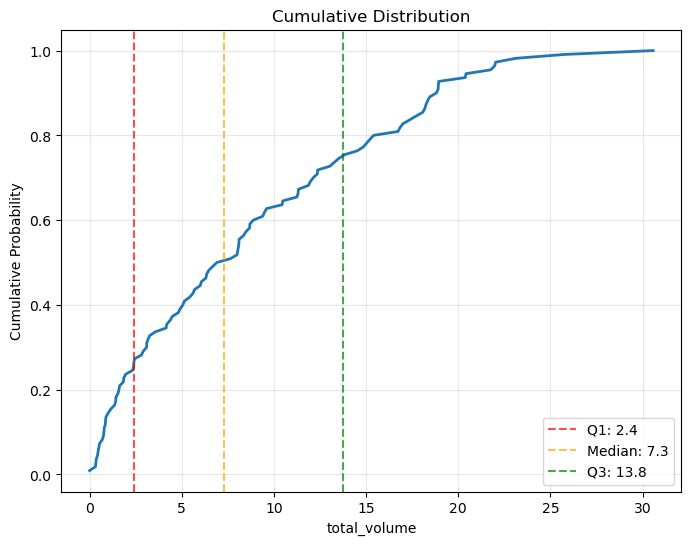

In [14]:
data_sorted = df_clean[column_name].dropna().sort_values()

plt.figure(figsize=(8, 6))
x = np.sort(data_sorted)
y = np.arange(1, len(x) + 1) / len(x)
plt.plot(x, y, linewidth=2)
plt.title('Cumulative Distribution')
plt.xlabel(column_name)
plt.ylabel('Cumulative Probability')
plt.grid(True, alpha=0.3)

# Add quartile lines
q25, q50, q75 = np.percentile(data_sorted, [25, 50, 75])
plt.axvline(q25, color='red', linestyle='--', alpha=0.7, label=f'Q1: {q25:.1f}')
plt.axvline(q50, color='orange', linestyle='--', alpha=0.7, label=f'Median: {q50:.1f}')
plt.axvline(q75, color='green', linestyle='--', alpha=0.7, label=f'Q3: {q75:.1f}')
plt.legend()
plt.show()